In [13]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart Disease /heart.csv")

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1).values
y = data['target'].values

# Normalize the data (scaling to a range between 0 and 1)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)


In [4]:
class HeartDiseaseModel(nn.Module):
    def __init__(self):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(in_features=X_train.shape[1], out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.out = nn.Linear(in_features=32, out_features=2)  # 2 output classes (0 and 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x

model = HeartDiseaseModel()


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
def train_model(model, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

train_model(model, X_train, y_train)


Epoch 10/100, Loss: 0.6596749424934387
Epoch 20/100, Loss: 0.6257461309432983
Epoch 30/100, Loss: 0.5785712599754333
Epoch 40/100, Loss: 0.5188233256340027
Epoch 50/100, Loss: 0.4576101303100586
Epoch 60/100, Loss: 0.4099617302417755
Epoch 70/100, Loss: 0.37736111879348755
Epoch 80/100, Loss: 0.3559640944004059
Epoch 90/100, Loss: 0.34059956669807434
Epoch 100/100, Loss: 0.32879921793937683


In [7]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

evaluate_model(model, X_test, y_test)


Test Accuracy: 84.39%


In [10]:
# Example new data point with feature values
new_data_point = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

new_data = torch.FloatTensor(new_data_point)
model.eval()
with torch.no_grad():
    output = model(new_data)
    _, predicted = torch.max(output, 0)
    print(f"Predicted Class: {predicted.item()}")


Predicted Class: 0


In [11]:
new_data_point = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
new_data = torch.FloatTensor(new_data_point)
model.eval()
with torch.no_grad():
    output = model(new_data)
    predicted_class = output.argmax().item()
    class_probabilities = torch.softmax(output, dim=0).numpy()

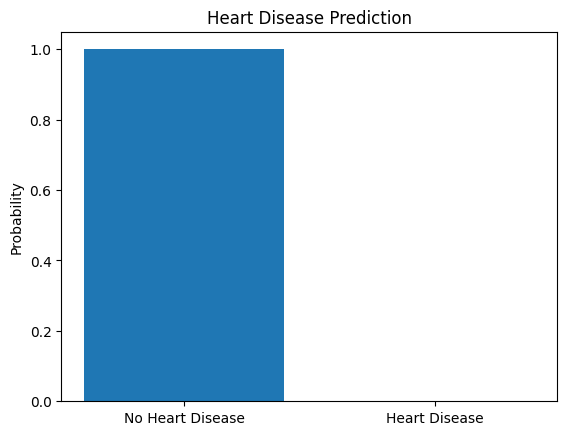

In [14]:
classes = ['No Heart Disease', 'Heart Disease']
plt.bar(classes, class_probabilities)
plt.ylabel('Probability')
plt.title('Heart Disease Prediction')
plt.show()

In [15]:
print(f"Predicted Class: {classes[predicted_class]}")


Predicted Class: No Heart Disease
